In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import glob
import skimage.io
from matplotlib.colors import ListedColormap

In [15]:

file_dir = '../Annotations/clean/Part01/'

def compute_label(im, c):
    
    d = np.zeros((im.shape[0], im.shape[1], c.shape[0]))
    
    for i in range(c.shape[0]):
        d[:,:,i] = (np.abs(im[:,:,:3] - c[i])).sum(axis=2)
    label = np.argmin(d, axis=2)
    return label

def label_to_layer(label):
    layer = np.zeros((im.shape[0], im.shape[1], label.max()+1))
    for i in range(label.max()+1):
        layer[:,:,i] = label==i
    return layer

c = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])

labels = []
layers = []

imfiles = sorted(glob.glob(f'{file_dir}*.png'))

for i, imfile in enumerate(imfiles):
    im = skimage.io.imread(imfile)
    labels.append(compute_label(im, c))
    layers.append(label_to_layer(labels[i]))

In [3]:
print(layers[0].max())

1.0


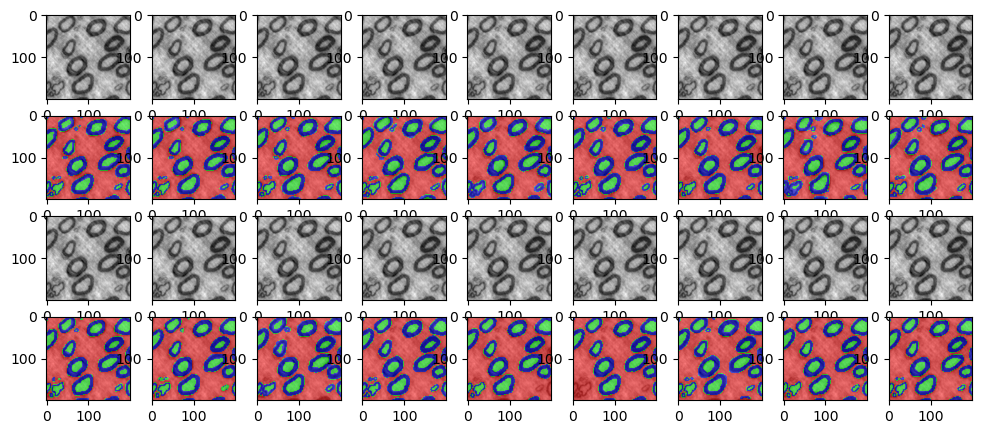

In [12]:
# Visualize the labeling
# define colormap 
rgbcmap = ListedColormap(np.array([[0,0,1.,1.], [0,1.,0,1.], [1.,0,0,1.]]))

im_org = skimage.io.imread('../Annotations/slice_099.tif')
fig, ax = plt.subplots(4, 9, figsize=(12,5))
for i in range(9):
    ax[0,i].imshow(im_org, cmap='gray')
    ax[1,i].imshow(im_org, cmap='gray')
    ax[1,i].imshow(labels[i], cmap=rgbcmap, alpha=0.5)
    ax[2,i].imshow(im_org, cmap='gray')
    ax[3,i].imshow(im_org, cmap='gray')
    ax[3,i].imshow(labels[i+9], cmap=rgbcmap, alpha=0.5)


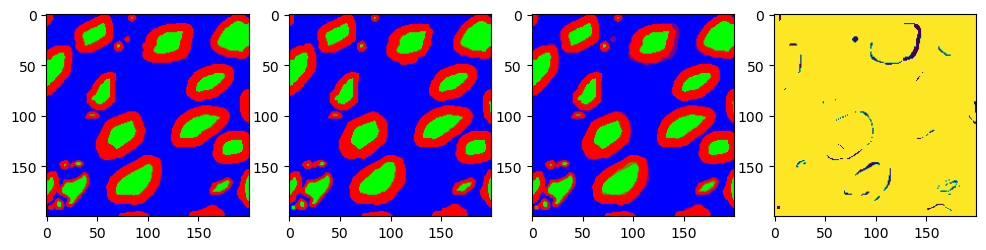

In [4]:
#%% Visualization of variation in labeling

layers_mean = (layers[0]+layers[1])/2
fig, ax = plt.subplots(1,4, figsize=(12,5))
ax[0].imshow(layers[0])
ax[1].imshow(layers[1])
ax[2].imshow(layers_mean)
ax[3].imshow(layers_mean.max(axis=2))
plt.show()


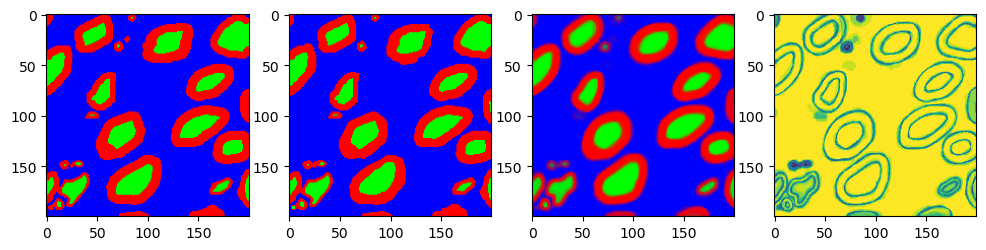

In [5]:
layers_mean = np.stack(layers).mean(axis=0)
fig, ax = plt.subplots(1,4, figsize=(12,5))
ax[0].imshow(layers[0])
ax[1].imshow(layers[1])
ax[2].imshow(layers_mean)
ax[3].imshow(layers_mean.max(axis=2))
plt.show()